In [1]:
import numpy as np
import sklearn
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from matplotlib import rc
from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import MaxNLocator
import scipy.signal
import xgboost as xgb
from xgboost.sklearn import XGBClassifier


/home/naireen/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
dataset = pd.read_csv("../../csvs/BetaFeats/sifOrbsMore=10000.0Nout=100window=10.csv", index_col = 0)
print dataset.columns.values

['runstring' 't_final_short' 'Rel_Eerr_short' 'avg_beta12' 'std_beta12'
 'min_beta12' 'max_beta12' 'avg_beta23' 'std_beta23' 'min_beta23'
 'max_beta23' 'avg_a1' 'std_a1' 'max_a1' 'min_a1' 'norm_std_a1'
 'norm_max_a1' 'norm_std_window10_a1' 'norm_max_window10_a1' 'avg_e1'
 'std_e1' 'max_e1' 'min_e1' 'norm_std_e1' 'norm_max_e1'
 'norm_std_window10_e1' 'norm_max_window10_e1' 'avg_inc1' 'std_inc1'
 'max_inc1' 'min_inc1' 'norm_std_inc1' 'norm_max_inc1'
 'norm_std_window10_inc1' 'norm_max_window10_inc1' 'avg_eH1' 'std_eH1'
 'max_eH1' 'min_eH1' 'avg_iH1' 'std_iH1' 'max_iH1' 'min_iH1' 'avg_ecross1'
 'std_ecross1' 'max_ecross1' 'min_ecross1' 'norm_a1_slope' 'avg_a2'
 'std_a2' 'max_a2' 'min_a2' 'norm_std_a2' 'norm_max_a2'
 'norm_std_window10_a2' 'norm_max_window10_a2' 'avg_e2' 'std_e2' 'max_e2'
 'min_e2' 'norm_std_e2' 'norm_max_e2' 'norm_std_window10_e2'
 'norm_max_window10_e2' 'avg_inc2' 'std_inc2' 'max_inc2' 'min_inc2'
 'norm_std_inc2' 'norm_max_inc2' 'norm_std_window10_inc2'
 'norm_max_window

In [3]:
features = []
features += ['avg_iH1', 'avg_iH2']
features += ['norm_std_a1', 'norm_max_a1', 'norm_std_window10_a1', 'norm_max_window10_a1']
features += ['norm_std_a2', 'norm_max_a2', 'norm_std_window10_a2', 'norm_max_window10_a2']
features += ['norm_std_a3', 'norm_max_a3', 'norm_std_window10_a3', 'norm_max_window10_a3']
features += ['avg_ecross1', 'std_ecross1', 'max_ecross1', 'min_ecross1']
features += ['avg_ecross2', 'std_ecross2', 'max_ecross2', 'min_ecross2']
features += ['avg_ecross3', 'std_ecross3', 'max_ecross3', 'min_ecross3']
features += ['norm_a1_slope', 'norm_a2_slope', 'norm_a3_slope']
features += ['avg_beta12','std_beta12','min_beta12','max_beta12','avg_beta23','std_beta23','min_beta23','max_beta23'] 
y = dataset['Stable']
X = dataset[features]
X.head()

,avg_iH1,avg_iH2,norm_std_a1,norm_max_a1,norm_std_window10_a1,norm_max_window10_a1,norm_std_a2,norm_max_a2,norm_std_window10_a2,norm_max_window10_a2,...,norm_a2_slope,norm_a3_slope,avg_beta12,std_beta12,min_beta12,max_beta12,avg_beta23,std_beta23,min_beta23,max_beta23
0,0.396282,0.481704,0.000329,0.001083,0.000214,0.000456,0.000701,0.001978,0.000446,0.000964,...,2.144832e-10,2.681898e-11,8.488064,0.048209,8.344623,8.551727,15.791595,0.085995,15.576612,16.019985
1,1.034575,0.823935,0.000739,0.002137,0.000202,0.000463,0.000200,0.000350,0.000226,0.000377,...,3.559377e-11,-9.314702e-11,8.414875,0.039142,8.308582,8.495900,15.314101,0.037065,15.254833,15.368196
2,0.440470,0.491261,0.001951,0.003550,0.001735,0.002860,0.002303,0.004034,0.002080,0.003409,...,-3.330088e-11,-4.095504e-11,3.566625,0.132349,3.331239,3.773868,25.113282,0.137779,24.898424,25.351948
3,0.432098,0.550624,0.000026,0.000120,0.000005,0.000009,0.000019,0.000050,0.000016,0.000041,...,7.816527e-13,-7.257099e-12,18.513867,0.003597,18.498104,18.521611,19.142029,0.008997,19.120348,19.156777
4,5.722053,17.442426,0.028284,0.063028,0.004313,0.010716,0.038832,0.160685,0.090892,0.112168,...,3.913858e-08,-2.610208e-08,23.314674,6.756316,3.957209,38.942908,-19.036068,5.544896,-21.930247,4.156005


In [4]:
Nrows = int(0.8*X.shape[0])
trainX = X.iloc[:Nrows, :]
trainY = y.iloc[:Nrows]
testX = X.iloc[Nrows:, :]
testY = y.iloc[Nrows:]
xgbc = XGBClassifier(seed = 0)

In [5]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [6]:
space ={
        'max_depth': hp.randint('x_max_depth',  20),
        'min_child_weight': hp.quniform ('x_min_child', 1, 10, 1),
        'subsample': hp.uniform ('x_subsample', 0.8, 1),
        'scale_pos_weight': hp.uniform("x_pos_weight", 1, 15),
        "learning_rate":hp.uniform("x_learning_rate",0.01,0.2),
        'colsample_bytree': hp.uniform ('x_tree_colsample', 0.5,1),
}

dtrain = xgb.DMatrix(trainX, trainY)
dtest = xgb.DMatrix(testX, testY)
def objective(space):

    clf = XGBClassifier(n_estimators = 100, 
                            max_depth = space['max_depth'], 
                            min_child_weight =space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree =space['colsample_bytree'],
                            learning_rate = space['learning_rate'], seed = 0)
    
    params = clf.get_xgb_params()
    #dtest
    score = xgb.cv(params, dtrain, nfold = 5, metrics = "auc", early_stopping_rounds=10)
    #print score
    #score = cross_val_score(clf, trainX, trainY, cv = 5, scoring="average_precision")
    avg_score =  np.mean(score["test-auc-mean"])
    error = np.mean(score["test-auc-std"])
    
    bst = xgb.train(params, dtrain)
    preds = bst.predict(dtest)
    test_score = metrics.roc_auc_score(testY, preds)
    
    print "SCORE:", avg_score, "ERROR", error, "HOLDOUT SCORE", test_score

    return{'loss':1-test_score, 'status': STATUS_OK, "cv_score":avg_score , "cv_error":error, "holdout":test_score }

In [7]:
trials = Trials()
import time
start = time.time()
best = fmin(fn=objective, space = space, algo = tpe.suggest, max_evals = 50, trials = trials)
end = time.time()
print("Optimization Time: %f seconds", (end  -start))

SCORE: 0.97338118 ERROR 0.0014157355216 HOLDOUT SCORE 0.9824637540069695
SCORE: 0.5 ERROR 0.0 HOLDOUT SCORE 0.5
SCORE: 0.97242822 ERROR 0.00110203331022 HOLDOUT SCORE 0.9814924131695519
SCORE: 0.97125484 ERROR 0.00161885718133 HOLDOUT SCORE 0.9790514941340028
SCORE: 0.96234858 ERROR 0.00162096841523 HOLDOUT SCORE 0.9724803239389018
SCORE: 0.97143778 ERROR 0.0013637613975 HOLDOUT SCORE 0.980016886618871
SCORE: 0.97272706 ERROR 0.000977741539856 HOLDOUT SCORE 0.981245682208176
SCORE: 0.97147748 ERROR 0.000999577767547 HOLDOUT SCORE 0.9808008962407919
SCORE: 0.5 ERROR 0.0 HOLDOUT SCORE 0.5
SCORE: 0.97185136 ERROR 0.000835782959831 HOLDOUT SCORE 0.9799498629281747
SCORE: 0.97006712 ERROR 0.00133237261235 HOLDOUT SCORE 0.9795945535878704
SCORE: 0.9717443 ERROR 0.000796409746859 HOLDOUT SCORE 0.9798251988634793
SCORE: 0.97315274 ERROR 0.000740546651461 HOLDOUT SCORE 0.9818812343552044
SCORE: 0.9571967 ERROR 0.00252262846494 HOLDOUT SCORE 0.9723187130647102
SCORE: 0.96788612 ERROR 0.001284594

In [8]:
#fit the smaller rage 
#{'x_learning_rate': 0.07419653015127085,
# 'x_max_depth': 8,
# 'x_min_child': 4.0,
# 'x_pos_weight': 8.889472764333366,
# 'x_subsample': 0.9380315392096068,
# 'x_tree_colsample': 0.734517699234413}

#{'x_learning_rate': 0.19890696372714528,
# 'x_max_depth': 17,
# 'x_min_child': 8.0,
# 'x_pos_weight': 12.505309968632893,
# 'x_subsample': 0.9409498631912948,
# 'x_tree_colsample': 0.7528946858805113}

best

{'x_learning_rate': 0.19760869359307348,
 'x_max_depth': 12,
 'x_min_child': 9.0,
 'x_pos_weight': 12.732752383933038,
 'x_subsample': 0.8996552766808443,
 'x_tree_colsample': 0.8268499874403428}

In [9]:
#switch to the traditional 80 20 slipt, dont know why i did the 40 60 split before
Nrows = int(0.8*X.shape[0])
trainX = X.iloc[:Nrows, :]
trainY = y.iloc[:Nrows]
testX = X.iloc[Nrows:, :]
testY = y.iloc[Nrows:]



best_xgbc = XGBClassifier(n_estimators=100, scale_pos_weight=best["x_pos_weight"],
                         learning_rate = best["x_learning_rate"], 
                         max_depth = int(best["x_max_depth"]), 
                         min_child_weight = best["x_min_child"],
                         subsample = best["x_subsample"], 
                         colsample_bytree = best["x_tree_colsample"])
params = best_xgbc.get_xgb_params()
#score = xgb.cv(params, dtrain, nfold = 5, metrics = "auc", verbose_eval=True)
#print score
d_Train = xgb.DMatrix(trainX, trainY)
d_Test = xgb.DMatrix(testX)
bst = xgb.train(params, d_Train)
preds = bst.predict(d_Test)
score = metrics.average_precision_score(testY, preds)
print score

0.9705742186655211


In [10]:
print best

{'x_pos_weight': 12.732752383933038, 'x_learning_rate': 0.19760869359307348, 'x_max_depth': 12, 'x_min_child': 9.0, 'x_tree_colsample': 0.8268499874403428, 'x_subsample': 0.8996552766808443}


Text(0.5,1,u'ROC curve (AUC = 0.981)')

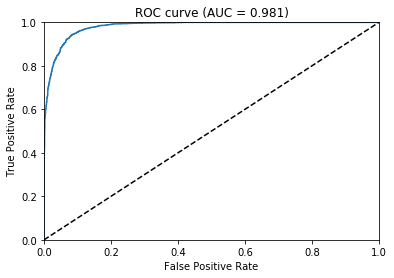

In [11]:
#the ROCAUC score is now 98.0 witht eh 2080 split compared to the 40 60 from before 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(testY, preds)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve (AUC = {0:.3f})'.format(metrics.roc_auc_score(testY, preds)))

In [13]:
precision, recall, thresholds = sklearn.metrics.precision_recall_curve(testY, preds)
for i in range(0,len(recall), 15):
    print("Threshold {0}, recall = {1}, precision = {2}".format(thresholds[i], recall[i], precision[i]))



Threshold 0.0854968652129, recall = 1.0, precision = 0.60959752322
Threshold 0.0867432281375, recall = 0.999492127984, precision = 0.612321095208
Threshold 0.0882349535823, recall = 0.999492127984, precision = 0.615192247577
Threshold 0.0906180664897, recall = 0.999492127984, precision = 0.618090452261
Threshold 0.0922724157572, recall = 0.998984255967, precision = 0.621288692356
Threshold 0.0942688137293, recall = 0.998984255967, precision = 0.624246271025
Threshold 0.095736220479, recall = 0.998476383951, precision = 0.62711323764
Threshold 0.0981476083398, recall = 0.998476383951, precision = 0.630128205128
Threshold 0.0998231321573, recall = 0.998476383951, precision = 0.633172302738
Threshold 0.101570516825, recall = 0.998476383951, precision = 0.636245954693
Threshold 0.104107901454, recall = 0.998476383951, precision = 0.639349593496
Threshold 0.105950862169, recall = 0.998476383951, precision = 0.642483660131
Threshold 0.108821772039, recall = 0.998476383951, precision = 0.6462

[0.9342688  0.9342688  0.3692601  0.93390214 0.9342688 ]
1969 3031
[  49. 1583.  215.  118.   87.   65.   37.   40.   36.   37.   24.   31.
   27.   16.   28.   18.   19.   13.   17.   20.   21.   13.   15.   13.
   16.   14.   10.   15.   14.   15.   15.   13.   12.   12.   13.   14.
   16.   10.   17.   26.   13.   12.   19.   16.   22.   26.   24.   37.
   36.   52.]
[   0    0    2    1    2    1    1    0    2    1    1    1    1    0
    0    3    4    1    3    2    1    1    3    2    6    3    1    2
    3    4    4    2    4    7    3    4    8    5   12    9   11   11
   17   16   35   34   59   77  145 1421]


(0, 350)

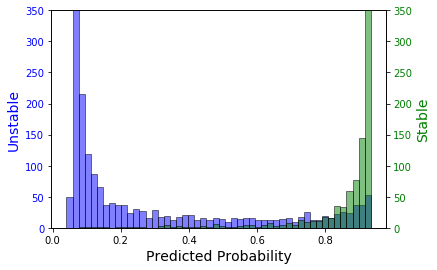

In [14]:
# Histogram:
bins = 50
Stable=preds[np.where(testY==1)]
print Stable[:5][:]
Unstable=preds[np.where(testY==0)]
print Stable.size, Unstable.size


fig, ax1 = plt.subplots()
n, bins, pathces = ax1.hist(Unstable, bins, alpha=0.5, label='No', color='blue', edgecolor = "black")
print n
ax1.set_xlabel('Predicted Probability', fontsize=14)
ax1.set_ylabel('Unstable',  fontsize=14, color='blue')
for tl in ax1.get_yticklabels():
    tl.set_color('blue')
    


ax2 = ax1.twinx()
n, bins , patches = ax2.hist(Stable, bins, alpha=0.5, label='Yes',color='green', edgecolor = "black")
print n.astype(int)
ax2.set_ylabel('Stable', fontsize=14, color='green')
for tl in ax2.get_yticklabels():
    tl.set_color('green')
    
    
#ax1.set_ylim(ax2.get_ylim())
ax1.set_ylim([0,350]) # goes up to ~4300
ax2.set_ylim([0,350]) # goes up to ~2100

In [15]:
gains = bst.get_score(importance_type='gain')
total_gains = np.sum(gains.values())
#print gains.keys()
#print gains.values()/total_gains*100.
#print np.sum(gains.values()/total_gains*100.)
a = {k: v / total_gains*100. for k, v in gains.iteritems()}

In [16]:
print a

{'avg_iH2': 0.6647482226600516, 'avg_iH1': 0.7068346652276927, 'std_ecross3': 1.272927962927712, 'norm_std_a3': 0.7500232655551147, 'norm_std_a2': 0.7776664171276642, 'norm_std_a1': 0.9140952612961093, 'max_beta23': 1.0702332919399484, 'std_beta12': 33.62456028730671, 'norm_std_window10_a1': 0.8746978150080518, 'norm_std_window10_a2': 0.8076950979796139, 'norm_std_window10_a3': 1.139049706242679, 'avg_ecross3': 2.858541017915359, 'avg_ecross2': 1.4049002134382367, 'avg_ecross1': 1.3556437700692834, 'avg_beta23': 0.7810204059049021, 'min_beta12': 1.654145222542038, 'max_ecross1': 1.5356580642219029, 'max_ecross3': 1.7161898627965042, 'max_ecross2': 12.798008769676716, 'min_ecross1': 0.7321638277872881, 'norm_a3_slope': 0.7430220426337476, 'norm_a2_slope': 1.5476498842123578, 'avg_beta12': 0.5820922981380633, 'norm_max_a1': 1.0808932852511541, 'norm_max_a2': 10.42555084087877, 'std_beta23': 8.12769177327976, 'max_beta12': 0.7587385003601631, 'min_ecross3': 1.0879591756496487, 'min_ecross

IGNORE THE REST, THIS IS FOR FURTHER OPTIMIZATION

#continue optimization from where we left off
#trials = Trials()
import time
start = time.time()
best = fmin(fn=objective, space = space, algo = tpe.suggest, max_evals = 200, trials = trials)
end = time.time()
print("Optimization Time: %f seconds", (end  -start))

best

#switch to the traditional 80 20 slipt, dont know why i did the 40 60 split before
Nrows = int(0.8*X.shape[0])
trainX = X.iloc[:Nrows, :]
trainY = y.iloc[:Nrows]
testX = X.iloc[Nrows:, :]
testY = y.iloc[Nrows:]



best_xgbc = XGBClassifier(n_estimators=100, scale_pos_weight=best["x_pos_weight"],
                         learning_rate = best["x_learning_rate"], 
                         max_depth = int(best["x_max_depth"]), 
                         min_child_weight = best["x_min_child"],
                         subsample = best["x_subsample"], 
                         colsample_bytree = best["x_tree_colsample"], seed = 0)
params = best_xgbc.get_xgb_params()
#score = xgb.cv(params, dtrain, nfold = 5, metrics = "auc", verbose_eval=True)
#print score
d_Train = xgb.DMatrix(trainX, trainY)
d_Test = xgb.DMatrix(testX)
bst = xgb.train(params, d_Train)
preds = bst.predict(d_Test)
score = metrics.average_precision_score(testY, preds)
print score

#the ROCAUC score is now 98.0 witht eh 2080 split compared to the 40 60 from before 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(testY, preds)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve (AUC = {0:.3f})'.format(metrics.roc_auc_score(testY, preds)))

#continue optimization from where we left off
#trials = Trials()
#import time
start = time.time()
best = fmin(fn=objective, space = space, algo = tpe.suggest, max_evals = 200, trials = trials)
end = time.time()
print("Optimization Time: %f seconds", (end  -start))

print len(trials.trials)
#for i in range(200)
complete_results = [x["result"]["cv_score"] for x in trials]
print np.max(complete_results)
#print trials.trials["result"]["cv_score"]

#continue optimization from where we left off
#trials = Trials()
#import time
start = time.time()
best = fmin(fn=objective, space = space, algo = tpe.suggest, max_evals = 240, trials = trials)
end = time.time()
print("Optimization Time: %f seconds", (end  -start))

best_xgbc = XGBClassifier(n_estimators=100, scale_pos_weight=best["x_pos_weight"],
                         learning_rate = best["x_learning_rate"], 
                         max_depth = int(best["x_max_depth"]), 
                         min_child_weight = best["x_min_child"],
                         subsample = best["x_subsample"], 
                         colsample_bytree = best["x_tree_colsample"], seed = 0)
params = best_xgbc.get_xgb_params()

bst = xgb.train(params, d_Train)
preds = bst.predict(d_Test)
score = metrics.average_precision_score(testY, preds)
print score
#the ROCAUC score is now 98.0 witht eh 2080 split compared to the 40 60 from before 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(testY, preds)
fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC curve (AUC = {0:.3f})'.format(metrics.roc_auc_score(testY, preds)))

print best

In [25]:
import pickle
pickle.dump(bst, open("../../Analysis/Testing/final.pkl", "wb"))
